**1.** Importar framework de trabajo siguiendo los pasos del tutorial 3.

In [1]:
!rm -rf Uniandes_Framework
!git lfs clone https://github.com/Phenomenology-group-uniandes/Uniandes_Framework.git

          with new flags from 'git clone'

'git clone' has been updated in upstream Git to have comparable
speeds to 'git lfs clone'.
Cloning into 'Uniandes_Framework'...
remote: Enumerating objects: 115, done.
remote: Counting objects: 100% (115/115), done.
remote: Compressing objects: 100% (91/91), done.
remote: Total 115 (delta 27), reused 102 (delta 22), pack-reused 0
Receiving objects: 100% (115/115), 422.20 KiB | 1.52 MiB/s, done.
Resolving deltas: 100% (27/27), done.


In [2]:
import os, sys
sys.path.append(f'{os.getcwd()}/Uniandes_Framework')

In [3]:
from delphes_reader import DelphesLoader #Permite acceder a los archivos .root guardados en el servidor
from delphes_reader import clasificator #Contiene funciones como get_muons para extraer partículas de un evento de un archivo de delphes.
from delphes_reader import root_analysis #Contiene funciones para extraer variables cinematicas y crear histogramas.
from delphes_reader import Quiet #Permite evitar que se impriman muchas excepciones que normalmente aparecen al leer archivos de delphes.

Welcome to JupyROOT 6.22/06


**2.** Usemos DelphesLoader para obtener la ruta de algún archivo .root alojado en el servidor.

Para esto simplemente hay que usar DelphesLoader('ww').Forest o DelphesLoader('z_jets').Forest

Por ejemplo:

In [4]:
Rutas = DelphesLoader('z_jets').Forest

z_jets imported with 500 trees!
/Madgraph_Simulations/SM_Backgrounds/z_jets/


Imprimamos Rutas para ver que es

In [5]:
Rutas

['/Madgraph_Simulations/SM_Backgrounds/z_jets/z+jets_1/Events/run_01/m_delphes_events.root',
 '/Madgraph_Simulations/SM_Backgrounds/z_jets/z+jets_2/Events/run_01/m_delphes_events.root',
 '/Madgraph_Simulations/SM_Backgrounds/z_jets/z+jets_3/Events/run_01/m_delphes_events.root',
 '/Madgraph_Simulations/SM_Backgrounds/z_jets/z+jets_4/Events/run_01/m_delphes_events.root',
 '/Madgraph_Simulations/SM_Backgrounds/z_jets/z+jets_5/Events/run_01/m_delphes_events.root',
 '/Madgraph_Simulations/SM_Backgrounds/z_jets/z+jets_6/Events/run_01/m_delphes_events.root',
 '/Madgraph_Simulations/SM_Backgrounds/z_jets/z+jets_7/Events/run_01/m_delphes_events.root',
 '/Madgraph_Simulations/SM_Backgrounds/z_jets/z+jets_8/Events/run_01/m_delphes_events.root',
 '/Madgraph_Simulations/SM_Backgrounds/z_jets/z+jets_9/Events/run_01/m_delphes_events.root',
 '/Madgraph_Simulations/SM_Backgrounds/z_jets/z+jets_10/Events/run_01/m_delphes_events.root',
 '/Madgraph_Simulations/SM_Backgrounds/z_jets/z+jets_11/Events/run_01

Es una lista con todas las rutas a los archivos .root de z_jets alojados en el servidor. Usemos solo la primera para este tutorial básico.

In [6]:
Rutas[0] #con [0] se llama a la primera

'/Madgraph_Simulations/SM_Backgrounds/z_jets/z+jets_1/Events/run_01/m_delphes_events.root'

**3.** Importar TChain desde ROOT para poder leer el archivo.

In [7]:
from ROOT import TChain

**4.** Extraígamos todas los muones contenidos en este archivo.

In [8]:
tree = TChain("Delphes;1") #Arbol de datos, ahora debemos añadirle la ruta
tree.Add(Rutas[0]) #Ahora tree es el arbol de datos asociado a Rutas[0]

#Este archivo.root contiene 50000 eventos, para optimizar la velocidad de este tutorial recorramos solo los primeros 1000, para esto debemos definir una variable que lleve la cuenta:
n = 0

for event in tree:
    if (n == 1000): break #el for acaba cuando n llega a 10000
    else: n = n + 1 #el for continua pero se aumenta en 1 el valor de n
    
    #Para extraer los muones presentes en el evento debemos recurrir a clasificator.get_muons e ingresar como parametro el evento.
    muons = clasificator.get_muons(event) #Así, muons es una lista que contiene a todos los objetos tipos muon presentes en el evento.
    
    #Antes de pensar en extraer las variables cinematicas debemos revisar que la lista no este vacía.
    if (len(muons) == 0): continue #El for finaliza este ciclo cuando no hay muones, empieza el recorrido para el siguiente evento.
    
    #De forma similar podemos revisar que hayan dos muones.
    if (len(muons) < 2): continue #El for finaliza este ciclo cuando no hay al menos 2 muones, empieza el recorrido para el siguiente evento.
    
    #En este punto cualquier evento que llegue hasta esta parte del código debe tener al menos 2 muones, por lo que podemos llamarlos sin tener problemas:
    muon1 = muons[0]
    muon2 = muons[1]
    
    #Ahora, para extraer las variables cinematicas simplemente toca usar los metodos de la clase partículas, por ejemplo:    
    pT = muons[0].pt()

Warning in <TClass::Init>: no dictionary for class HepMCEvent is available
Warning in <TClass::Init>: no dictionary for class Event is available
Warning in <TClass::Init>: no dictionary for class GenParticle is available
Warning in <TClass::Init>: no dictionary for class SortableObject is available
Warning in <TClass::Init>: no dictionary for class Track is available
Warning in <TClass::Init>: no dictionary for class Tower is available
Warning in <TClass::Init>: no dictionary for class Jet is available
Warning in <TClass::Init>: no dictionary for class MissingET is available
Warning in <TClass::Init>: no dictionary for class Electron is available
Warning in <TClass::Init>: no dictionary for class Photon is available
Warning in <TClass::Init>: no dictionary for class Muon is available
Warning in <TClass::Init>: no dictionary for class ScalarHT is available


Imprimamos pT para ver si efectivamente pT tiene un valor con sentido:

In [9]:
pT

27.386837005615234

Con esto claro, podríamos pensar también aplicar un corte en el momento, por ejemplo que el muon 1 tenga un pt mayor a 30:

In [10]:
#Claramente para hacerlo debemos escribir todo el código de arriba nuevamente:

tree = TChain("Delphes;1") #Arbol de datos, ahora debemos añadirle la ruta
tree.Add(Rutas[0]) #Ahora tree es el arbol de datos asociado a Rutas[0]

#Este archivo.root contiene 50000 eventos, para optimizar la velocidad de este tutorial recorramos solo los primeros 1000, para esto debemos definir una variable que lleve la cuenta:
n = 0

for event in tree:
    if (n == 1000): break #el for acaba cuando n llega a 10000
    else: n = n + 1 #el for continua pero se aumenta en 1 el valor de n
    
    #Para extraer los muones presentes en el evento debemos recurrir a clasificator.get_muons e ingresar como parametro el evento.
    muons = clasificator.get_muons(event) #Así, muons es una lista que contiene a todos los objetos tipos muon presentes en el evento.
    
    #Antes de pensar en extraer las variables cinematicas debemos revisar que la lista no este vacía.
    if (len(muons) == 0): continue #El for finaliza este ciclo cuando no hay muones, empieza el recorrido para el siguiente evento.
    
    #De forma similar podemos revisar que hayan dos muones.
    if (len(muons) < 2): continue #El for finaliza este ciclo cuando no hay al menos 2 muones, empieza el recorrido para el siguiente evento.
    
    #En este punto cualquier evento que llegue hasta esta parte del código debe tener al menos 2 muones, por lo que podemos llamarlos sin tener problemas:
    muon1 = muons[0]
    muon2 = muons[1]
    
    #Ahora, para extraer las variables cinematicas simplemente toca usar los metodos de la clase partículas, por ejemplo:    
    pT = muons[0].pt()
    
    #Ahora si añadamos código:
    
    if(pT < 30): continue
    print(pT)

270.6822204589844
58.45050430297852
44.494266510009766
35.032440185546875
49.55564117431641
47.303871154785156
42.269561767578125


Efectivamente solo se imprimen valores mayores que 30 como esperabamos. Si quisieramos podríamos hacer una lista en python y guardar esos valores. A la larga guardar los valores depende de la creatividad de cada persona. Sin embargo, hay un método de root_analysis llamado get_kinematics_row que permite extraer todas las variables cinemáticas:

In [11]:
#Claramente para hacerlDataFramebemos escribir todo el código de arriba nuevamente:

tree = TChain("Delphes;1") #Arbol de datos, ahora debemos añadirle la ruta
tree.Add(Rutas[0]) #Ahora tree es el arbol de datos asociado a Rutas[0]

#Este archivo.root contiene 50000 eventos, para optimizar la velocidad de este tutorial recorramos solo los primeros 1000, para esto debemos definir una variable que lleve la cuenta:
n = 0

for event in tree:
    if (n == 1000): break #el for acaba cuando n llega a 10000
    else: n = n + 1 #el for continua pero se aumenta en 1 el valor de n
    
    #Para extraer los muones presentes en el evento debemos recurrir a clasificator.get_muons e ingresar como parametro el evento.
    muons = clasificator.get_muons(event) #Así, muons es una lista que contiene a todos los objetos tipos muon presentes en el evento.
    
    #Antes de pensar en extraer las variables cinematicas debemos revisar que la lista no este vacía.
    if (len(muons) == 0): continue #El for finaliza este ciclo cuando no hay muones, empieza el recorrido para el siguiente evento.
    
    #De forma similar podemos revisar que hayan dos muones.
    if (len(muons) < 2): continue #El for finaliza este ciclo cuando no hay al menos 2 muones, empieza el recorrido para el siguiente evento.
    
    #En este punto cualquier evento que llegue hasta esta parte del código debe tener al menos 2 muones, por lo que podemos llamarlos sin tener problemas:
    muon1 = muons[0]
    muon2 = muons[1]
    
    #Ahora, para extraer las variables cinematicas simplemente toca usar los metodos de la clase partículas, por ejemplo:    
    pT = muons[0].pt()
    
    #Ahora si añadamos código:
    
    if(pT < 30): continue
    
    print(root_analysis.get_kinematics_row(muons[0]))

{'pT_{#mu}(GeV)': 270.6822204589844, '#eta_{#mu}': 1.3156737089157107, '#phi_{#mu}': -0.29182672500610346, 'Energy_{#mu}(GeV)': 540.7628247215982, 'Mass_{#mu}(GeV)': 0.10565837534770162}
{'pT_{#mu}(GeV)': 58.45050430297852, '#eta_{#mu}': 1.8908085823059073, '#phi_{#mu}': 1.6956651210784912, 'Energy_{#mu}(GeV)': 198.0207758459848, 'Mass_{#mu}(GeV)': 0.10565837551985922}
{'pT_{#mu}(GeV)': 44.494266510009766, '#eta_{#mu}': -0.30178877711296076, '#phi_{#mu}': -2.918978452682495, 'Energy_{#mu}(GeV)': 46.53600168215108, 'Mass_{#mu}(GeV)': 0.1056583755004915}
{'pT_{#mu}(GeV)': 35.032440185546875, '#eta_{#mu}': -1.451607584953308, '#phi_{#mu}': 0.23540805280208585, 'Energy_{#mu}(GeV)': 78.89604853900313, 'Mass_{#mu}(GeV)': 0.10565837549833952}
{'pT_{#mu}(GeV)': 49.55564117431641, '#eta_{#mu}': 1.2485618591308594, '#phi_{#mu}': 0.5541310906410217, 'Energy_{#mu}(GeV)': 93.46804693949507, 'Mass_{#mu}(GeV)': 0.10565837550264347}
{'pT_{#mu}(GeV)': 47.303871154785156, '#eta_{#mu}': 0.393165320158004

Este método extrae las variables cinematicas como directorios:

**5.** Guardemos esta información en una tabla y construyamos un archivo .csv

Una forma facil de esto radica en guardar todas las filas en una lista:

In [12]:
#Para esto debemos crear la lista:

lista = []

#Claramente para hacerlDataFramebemos escribir todo el código de arriba nuevamente:

tree = TChain("Delphes;1") #Arbol de datos, ahora debemos añadirle la ruta
tree.Add(Rutas[0]) #Ahora tree es el arbol de datos asociado a Rutas[0]

#Este archivo.root contiene 50000 eventos, para optimizar la velocidad de este tutorial recorramos solo los primeros 1000, para esto debemos definir una variable que lleve la cuenta:
n = 0

for event in tree:
    if (n == 1000): break #el for acaba cuando n llega a 10000
    else: n = n + 1 #el for continua pero se aumenta en 1 el valor de n
    
    #Para extraer los muones presentes en el evento debemos recurrir a clasificator.get_muons e ingresar como parametro el evento.
    muons = clasificator.get_muons(event) #Así, muons es una lista que contiene a todos los objetos tipos muon presentes en el evento.
    
    #Antes de pensar en extraer las variables cinematicas debemos revisar que la lista no este vacía.
    if (len(muons) == 0): continue #El for finaliza este ciclo cuando no hay muones, empieza el recorrido para el siguiente evento.
    
    #De forma similar podemos revisar que hayan dos muones.
    if (len(muons) < 2): continue #El for finaliza este ciclo cuando no hay al menos 2 muones, empieza el recorrido para el siguiente evento.
    
    #En este punto cualquier evento que llegue hasta esta parte del código debe tener al menos 2 muones, por lo que podemos llamarlos sin tener problemas:
    muon1 = muons[0]
    muon2 = muons[1]
    
    #Ahora, para extraer las variables cinematicas simplemente toca usar los metodos de la clase partículas, por ejemplo:    
    pT = muons[0].pt()
    
    #Ahora si añadamos código:
    
    if(pT < 30): continue
    
    lista.append(root_analysis.get_kinematics_row(muons[0]))

Así

In [13]:
lista

[{'pT_{#mu}(GeV)': 270.6822204589844,
  '#eta_{#mu}': 1.3156737089157107,
  '#phi_{#mu}': -0.29182672500610346,
  'Energy_{#mu}(GeV)': 540.7628247215982,
  'Mass_{#mu}(GeV)': 0.10565837534770162},
 {'pT_{#mu}(GeV)': 58.45050430297852,
  '#eta_{#mu}': 1.8908085823059073,
  '#phi_{#mu}': 1.6956651210784912,
  'Energy_{#mu}(GeV)': 198.0207758459848,
  'Mass_{#mu}(GeV)': 0.10565837551985922},
 {'pT_{#mu}(GeV)': 44.494266510009766,
  '#eta_{#mu}': -0.30178877711296076,
  '#phi_{#mu}': -2.918978452682495,
  'Energy_{#mu}(GeV)': 46.53600168215108,
  'Mass_{#mu}(GeV)': 0.1056583755004915},
 {'pT_{#mu}(GeV)': 35.032440185546875,
  '#eta_{#mu}': -1.451607584953308,
  '#phi_{#mu}': 0.23540805280208585,
  'Energy_{#mu}(GeV)': 78.89604853900313,
  'Mass_{#mu}(GeV)': 0.10565837549833952},
 {'pT_{#mu}(GeV)': 49.55564117431641,
  '#eta_{#mu}': 1.2485618591308594,
  '#phi_{#mu}': 0.5541310906410217,
  'Energy_{#mu}(GeV)': 93.46804693949507,
  'Mass_{#mu}(GeV)': 0.10565837550264347},
 {'pT_{#mu}(GeV)': 

Ahora para convertir esta información en un archivo csv simplemente hay que usar la función generate_csv de root_analysis:

In [14]:
root_analysis.generate_csv(lista, 'Data_muones.csv')

**6.** Leamos el archivo .csv para generar los histogramas:

Para leer archivos .csv debemos importar pandas, una librería de python que permite trabajar con big data:

In [15]:
import pandas as pd

Ahora simplemente basta con usar pd.read_csv y poner como parámetros el nombre del archivo e index_col = 0.

In [16]:
Data = pd.read_csv('Data_muones.csv', index_col= 0)

In [17]:
Data

,pT_{#mu}(GeV),#eta_{#mu},#phi_{#mu},Energy_{#mu}(GeV),Mass_{#mu}(GeV)
0,270.682220,1.315674,-0.291827,540.762825,0.105658
1,58.450504,1.890809,1.695665,198.020776,0.105658
2,44.494267,-0.301789,-2.918978,46.536002,0.105658
3,35.032440,-1.451608,0.235408,78.896049,0.105658
4,49.555641,1.248562,0.554131,93.468047,0.105658
5,47.303871,0.393165,-1.124028,51.007412,0.105658
6,42.269562,-1.163185,-2.388205,74.238101,0.105658


Para acceder a cada columna basta con usar las keys de este DataFrame:

In [18]:
Data.keys()

Index(['pT_{#mu}(GeV)', '#eta_{#mu}', '#phi_{#mu}', 'Energy_{#mu}(GeV)',
       'Mass_{#mu}(GeV)'],
      dtype='object')

In [19]:
Data['pT_{#mu}(GeV)']

0    270.682220
1     58.450504
2     44.494267
3     35.032440
4     49.555641
5     47.303871
6     42.269562
Name: pT_{#mu}(GeV), dtype: float64

Con esto ya se podrían generar los histogramas usando matplotlib. Sin embargo, existe una función de root_analysis que permite generar todos los histogramas de las columnas de un archivo csv:

In [20]:
histogramas = root_analysis.make_histograms(Data)

In [21]:
histogramas

{'pT_{#mu}(GeV)': <cppyy.gbl.TH1F object at 0x55e1b44efa20>,
 '#eta_{#mu}': <cppyy.gbl.TH1F object at 0x55e1a90594b0>,
 '#phi_{#mu}': <cppyy.gbl.TH1F object at 0x55e1a8f60880>,
 'Energy_{#mu}(GeV)': <cppyy.gbl.TH1F object at 0x55e1a8f43010>,
 'Mass_{#mu}(GeV)': <cppyy.gbl.TH1F object at 0x55e1a6fa99f0>}

Así, histogramas es un diccionario histogramas de root (TH1F)

**7.** Graficar histogramas

In [22]:
from ROOT import TCanvas #Permite mostrar graficas
from ROOT import TH1F #Permite graficar los histogramas en un TCanvas

In [23]:
canvas = TCanvas("Canvas", " ", 600, 400)

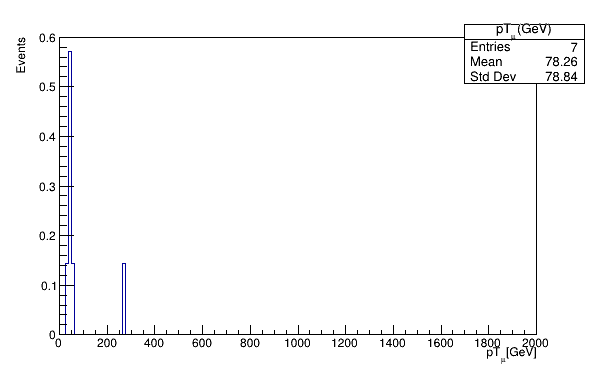

In [24]:
histogramas['pT_{#mu}(GeV)'].Draw('hist')
canvas.Draw()

**Notas:** 

Existen otras funciones, este es un tutorial muy resumido sobre el uso del Framework para leer un archivo.root y graficar histogramas. 

Para aprender a usar las otras funciones del Framework se recomienda ver: https://github.com/Phenomenology-group-uniandes/Uniandes_Framework/tree/main/Tutorials

Dependiendo la persona que este escribiendo el código esto se puede complificar tanto como se quiera.